<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFD700; 
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:black;"> 
    <center>SENTIMENT ANALYSIS</center>
</h1>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Packages</center>
</h1>
</div>

In [74]:
# Importing necessary packages
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import pandas as pd
import nltk
import textblob
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns

# Suppress NLTK download messages
nltk.download('vader_lexicon', quiet=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
import plotly
plotly.offline.init_notebook_mode(connected=True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Data</center>
</h1>
</div>

In [75]:
# Loading the dataset
data=pd.read_csv('/Users/dileepkumarkatla/Downloads/vaccination_tweets.csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Having A Look At The Data</center>
</h1>
</div>

In [76]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Preprocessing The Data</center>
</h1>
</div>

In [77]:
# Proprocessing the data
data['text']=data['text'].str.lower()
# Code to remove the Hashtags from the text
data['text']=data['text'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['text']=data['text'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['text']=data['text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['text']=data['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['text']=data['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['text']=data['text'].apply(lambda x:re.sub('@[^\s]+','',x))

In [78]:
# Selecting relevant columns
data=data[['text']]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1; /* Change this color */
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Vader Sentiment Analysis</center>
</h1>
</div>

In [79]:
# Invoking the TFIDFVectorizer
tf_data=TfidfVectorizer()
# Copying the data into a new dataframe called vader
vader=data.copy()
# Initializing VADER sentiment analyzer
sentiment=vad()
# Calculating sentiment scores and adding columns to the DataFrame
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['text'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
# Categorizing overall sentiment based on compound score
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [80]:
# Having a look at the vader datafram
vader.head()


,text,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,same folks said daikon paste could treatcytoki...,0.000,0.000,1.000,0.0000,Neutral
1,while the world has been on the wrong side of ...,0.125,0.109,0.766,-0.1027,Negative
2,russian vaccine is created to last 2 4 years,0.000,0.250,0.750,0.2500,Positive
3,facts are immutable senator even when you re n...,0.000,0.000,1.000,0.0000,Neutral
4,explain to me again why we needvaccine borisjo...,0.000,0.000,1.000,0.0000,Neutral


In [81]:
# Visualizing sentiment distribution with Plotly histogram
fig=px.histogram(data_frame=vader,x='Compound Score',color='Overall Sentiment',template='plotly')
fig.show()

<Figure size 800x600 with 0 Axes>

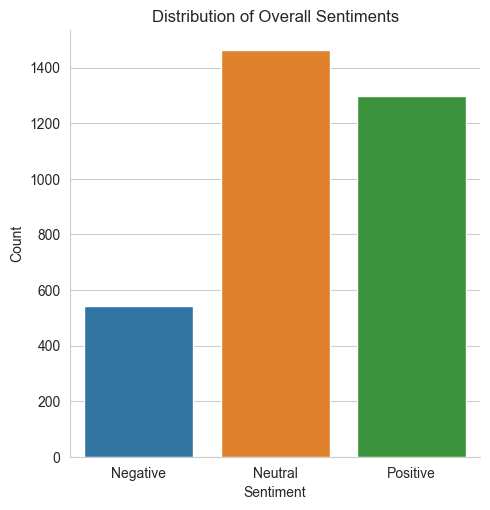

In [82]:
import seaborn as sns

# Assuming 'Negative', 'Neutral', 'Positive' are the categories in the 'Overall Sentiment' column
order = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(8, 6))  # Set figure size
# Plotting with specified order
sns.catplot(x='Overall Sentiment', kind='count', data=vader, order=order)

# Add title and labels
plt.title('Distribution of Overall Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

In [83]:
print('The text is :',vader['text'][6])
print('The vader sentiment Score of the data is :')
vader.iloc[6,1:]

The text is : it isbit sad to claim the fame for success of on patriotic competition between usa canada uk and
The vader sentiment Score of the data is :


Negative Score          0.126
Positive Score          0.267
Neutral Score           0.607
Compound Score         0.5423
Overall Sentiment    Positive
Name: 6, dtype: object

In [84]:
print('The text is :',vader['text'][30])
print('The vader sentiment Score of the data is :')
vader.iloc[30,1:]

The text is : zubymusic 6 deaths so far itonly death nothing to worry about then
The vader sentiment Score of the data is :


Negative Score          0.267
Positive Score          0.155
Neutral Score           0.578
Compound Score        -0.4133
Overall Sentiment    Negative
Name: 30, dtype: object

In [85]:
# Performing TF-IDF Vectorization
vader_data=tf_data.fit_transform(vader['text'].values)

In [86]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming vader_data is a sparse matrix
# Convert sparse matrix to a NumPy array
vader_array = vader_data.toarray()

# Perform PCA
pca = PCA(n_components=3).fit_transform(vader_array)


In [87]:
# Visualizing sentiment clusters with Plotly 3D scatter plot
px.scatter_3d(x=pca[:,0],y=pca[:,1],z=pca[:,2],color=vader['Overall Sentiment'].values)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1; /* Change this color */
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>TextBlob Sentiment Analysis</center>
</h1>
</div>

In [88]:
# Copying the data into new dataframe called textblob_data
textblob_data=data.copy()
# Creating additional columns containing polarity score , subjectivity and overall sentiment 
sentiment=[]
subjectivity=[]
sentiment_score=[]
for i in textblob_data['text'].values:
    Tweet = textblob.TextBlob(i)
    sentiment_score.append(Tweet.sentiment[0])
    if Tweet.sentiment[0]<0:
        sentiment.append('Negative')
    elif Tweet.sentiment[0]>0:
        sentiment.append('Positive')
    else:
        sentiment.append('Neutral')
    subjectivity.append(Tweet.sentiment[1])

In [89]:
textblob_data['Sentiment Score']=sentiment_score
textblob_data['Subjectivity']=subjectivity
textblob_data['Overall Sentiment']=sentiment

In [90]:
textblob_data.head()

,text,Sentiment Score,Subjectivity,Overall Sentiment
0,same folks said daikon paste could treatcytoki...,0.00,0.125000,Neutral
1,while the world has been on the wrong side of ...,-0.50,0.900000,Negative
2,russian vaccine is created to last 2 4 years,0.00,0.033333,Neutral
3,facts are immutable senator even when you re n...,-0.05,0.550000,Negative
4,explain to me again why we needvaccine borisjo...,0.00,0.000000,Neutral


In [91]:
# Visualizing sentiment distribution with Plotly histogram
px.histogram(data_frame=textblob_data,x='Sentiment Score',color='Overall Sentiment')

In [92]:
px.histogram(data_frame=textblob_data,x='Subjectivity',color='Overall Sentiment')

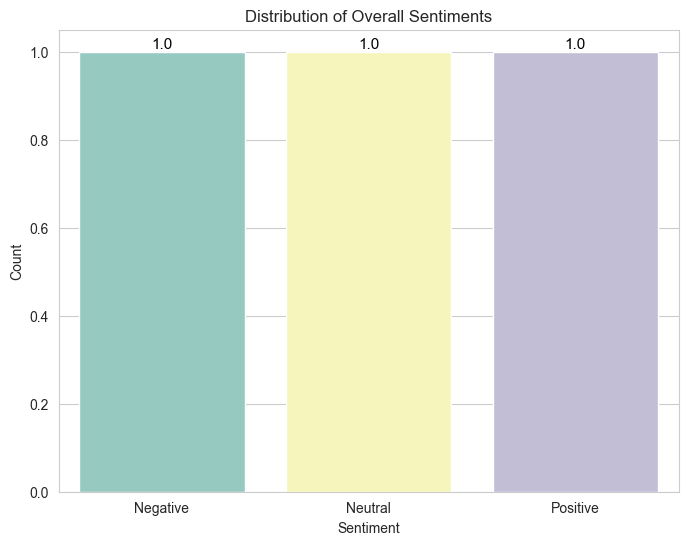

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Negative', 'Neutral', 'Positive' are the categories in the 'Overall Sentiment' column
order = ['Negative', 'Neutral', 'Positive']

# Get the value counts of 'Overall Sentiment' column and reorder based on 'order'
ordered_counts = textblob_data['Overall Sentiment'].value_counts()[order]

# Set style
sns.set_style("whitegrid")

# Plotting with specified order
plt.figure(figsize=(8, 6))  # Set figure size
ax = sns.countplot(x=ordered_counts.index, palette="Set3")  # Custom palette

# Add labels and title
ax.set_title('Distribution of Overall Sentiments')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [94]:
print('The sentence is :',textblob_data['text'][6])
textblob_data.iloc[6,1:]

The sentence is : it isbit sad to claim the fame for success of on patriotic competition between usa canada uk and


Sentiment Score          -0.1
Subjectivity              0.5
Overall Sentiment    Negative
Name: 6, dtype: object

In [95]:
print('The sentence is :',textblob_data['text'][30])
textblob_data.iloc[30,1:]

The sentence is : zubymusic 6 deaths so far itonly death nothing to worry about then


Sentiment Score           0.1
Subjectivity              1.0
Overall Sentiment    Positive
Name: 30, dtype: object

In [96]:
# Performing TF-IDF Vectorization for TextBlob data
textblob_vec=tf_data.fit_transform(textblob_data['text'].values)

In [97]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming textblob_vec is the matrix you want to perform PCA on

# Convert the matrix to a numpy array
textblob_array = np.asarray(textblob_vec.todense())

# Perform PCA transformation
pca2 = PCA(n_components=3).fit_transform(textblob_array)


In [98]:
# Visualizing sentiment clusters with Plotly 3D scatter plot
px.scatter_3d(x=pca2[:,0],y=pca2[:,1],z=pca2[:,2],color=textblob_data['Overall Sentiment'].values)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1; /* Change this color */
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Afinn Sentiment Analysis</center>
</h1>
</div>

In [99]:
# Afinn Sentiment Analysis
from afinn import Afinn

# Instantiate the Afinn object
afinn = Afinn()

# Compute sentiment scores
textblob_data['AFINN Score'] = [afinn.score(text) for text in textblob_data['text']]

# Classify sentiments
textblob_data['AFINN Sentiment'] = ['Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in textblob_data['AFINN Score']]

textblob_data.head()

,text,Sentiment Score,Subjectivity,Overall Sentiment,AFINN Score,AFINN Sentiment
0,same folks said daikon paste could treatcytoki...,0.00,0.125000,Neutral,0.0,Neutral
1,while the world has been on the wrong side of ...,-0.50,0.900000,Negative,0.0,Neutral
2,russian vaccine is created to last 2 4 years,0.00,0.033333,Neutral,0.0,Neutral
3,facts are immutable senator even when you re n...,-0.05,0.550000,Negative,0.0,Neutral
4,explain to me again why we needvaccine borisjo...,0.00,0.000000,Neutral,0.0,Neutral


In [100]:
# Visualizing sentiment distribution with Plotly histogram
import plotly.express as px
fig_afinn = px.histogram(textblob_data, x='AFINN Score', color='AFINN Sentiment', template='plotly')
fig_afinn.show()

<Axes: xlabel='AFINN Sentiment', ylabel='count'>

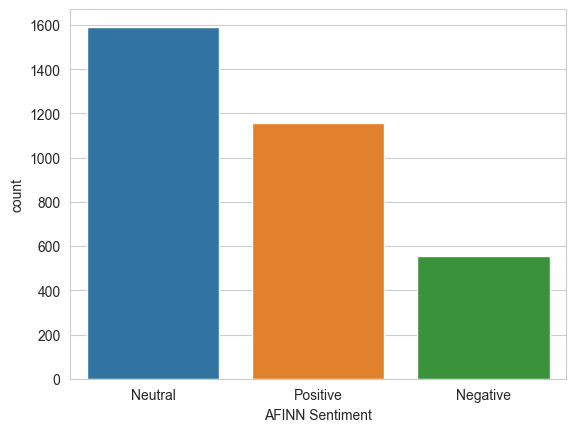

In [101]:
# Visualizing sentiment distribution with Seaborn countplot
import seaborn as sns
# Plotting countplot
sns.countplot(x='AFINN Sentiment', data=textblob_data)

In [102]:
print('The text is:', textblob_data['text'][6])
print('The AFINN Score of the data is:', textblob_data['AFINN Score'][6])
print('The AFINN Sentiment of the data is:', textblob_data['AFINN Sentiment'][6])

The text is: it isbit sad to claim the fame for success of on patriotic competition between usa canada uk and
The AFINN Score of the data is: 1.0
The AFINN Sentiment of the data is: Positive


In [103]:
index = 30
sentence = textblob_data['text'][index]
sentiment_score = textblob_data['AFINN Score'][index]
subjectivity = textblob_data['Subjectivity'][index]
overall_sentiment = textblob_data['Overall Sentiment'][index]

print('The sentence is:', sentence)
print('Sentiment Score:', sentiment_score)
print('Subjectivity:', subjectivity)
print('Overall Sentiment:', overall_sentiment)

The sentence is: zubymusic 6 deaths so far itonly death nothing to worry about then
Sentiment Score: -7.0
Subjectivity: 1.0
Overall Sentiment: Positive


In [104]:
import plotly.express as px

fig_afinn_scatter = px.scatter_3d(x=pca2[:,0], y=pca2[:,1], z=pca2[:,2], color=textblob_data['AFINN Sentiment'].values, title='AFINN Lexicon Sentiment Analysis')
fig_afinn_scatter.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1; /* Change this color */
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Bing Liu Sentiment Analysis</center>
</h1>
</div>

In [112]:
# Download the Bing Liu lexicon without displaying download messages
nltk.download('opinion_lexicon', quiet=True)

from nltk.corpus import opinion_lexicon

# Load positive and negative words from Bing Liu lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to compute sentiment using Bing Liu lexicon
def bing_liu_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_words)
    negative_count = sum(1 for word in text.split() if word in negative_words)
    
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'

# Apply Bing Liu sentiment analysis to the data
textblob_data['Bing Liu Sentiment'] = textblob_data['text'].apply(bing_liu_sentiment)

textblob_data.head()

,text,Sentiment Score,Subjectivity,Overall Sentiment,AFINN Score,AFINN Sentiment,Bing Liu Sentiment
0,same folks said daikon paste could treatcytoki...,0.00,0.125000,Neutral,0.0,Neutral,Neutral
1,while the world has been on the wrong side of ...,-0.50,0.900000,Negative,0.0,Neutral,Negative
2,russian vaccine is created to last 2 4 years,0.00,0.033333,Neutral,0.0,Neutral,Neutral
3,facts are immutable senator even when you re n...,-0.05,0.550000,Negative,0.0,Neutral,Positive
4,explain to me again why we needvaccine borisjo...,0.00,0.000000,Neutral,0.0,Neutral,Neutral


In [106]:
# Visualizing sentiment distribution using histogram
fig_bing_liu = px.histogram(textblob_data, x='Bing Liu Sentiment', color='Bing Liu Sentiment', template='plotly')
fig_bing_liu.show()

<Axes: xlabel='Bing Liu Sentiment', ylabel='count'>

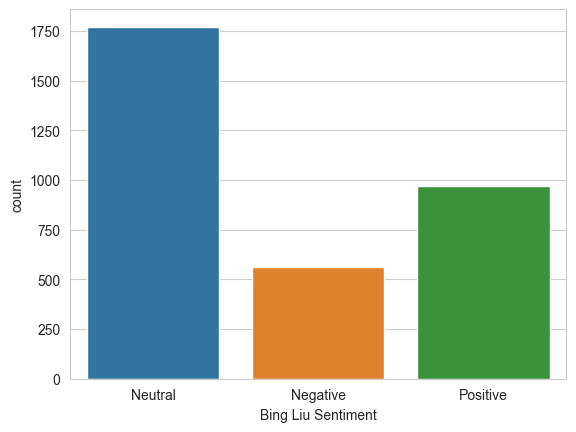

In [107]:
# Visualizing sentiment distribution using countplot
sns.countplot(x='Bing Liu Sentiment', data=textblob_data)

In [108]:
print('The text is:', textblob_data['text'][6])
print('The Bing Liu Sentiment of the data is:', textblob_data['Bing Liu Sentiment'][6])


The text is: it isbit sad to claim the fame for success of on patriotic competition between usa canada uk and
The Bing Liu Sentiment of the data is: Positive


In [109]:
print('The sentence is:', textblob_data['text'][30])
print('The Bing Liu Sentiment of the data is:', textblob_data['Bing Liu Sentiment'][30])

The sentence is: zubymusic 6 deaths so far itonly death nothing to worry about then
The Bing Liu Sentiment of the data is: Negative


In [110]:
# Visualizing sentiment analysis using 3D scatter plot
fig_bing_liu_scatter = px.scatter_3d(x=pca2[:,0], y=pca2[:,1], z=pca2[:,2], color=textblob_data['Bing Liu Sentiment'].values, title='Bing Liu Lexicon Sentiment Analysis')
fig_bing_liu_scatter.show()

In [111]:
# Selecting a superior method for sentiment analysis depends on the specific requirements of the task and characteristics of the data. However, VADER is often considered superior for social media text due to its nuanced analysis, considering context and punctuation, tailored lexicons, and rules designed for such data.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>𝕿𝖍𝖆𝖓𝖐 𝖄𝖔𝖚</center>
</h1>
</div>